### Position

> 
> ref: https://www.youtube.com/watch?v=_hAAyAJMlMI
>  

px := Position X
py := Position Y
Alpha := angle entre l'horizontal
R := Distance


<img src="./image1.png" width="300" />

### Acceleration

vecteur a := vers le centre de la terre


<img src="./image2.png" width="300" />

<img src="./image3.png" width="300" />

<img src="./image4.png" width="300" />


In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# constantes physiques
G = 6.67e-11 # Cte gravitation
MasseTerre = 6e24 # kg

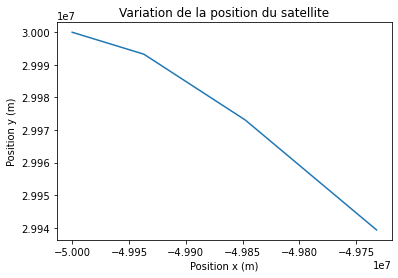

In [24]:
# position initiales
p0x = -5e7 # m
p0y = +3e7

# vitesses initiales
v0x = 100
v0y = 0

x = [p0x]
y = [p0y]

# intervalle de temps
Dt = 500 # secondes

for i in range(0,3):
    # Distance entre le satellite et centre de terre
    R = np.sqrt(p0x ** 2 + p0y ** 2)
    # 58309518.948453 m

    # Acceleration subi par le satellite 
    a = G * MasseTerre / (R ** 2) 
    # 0.11770588235294119

    # Cas particuliers
    if (p0x == 0):
        ax = 0
        ay = a
    if (p0y == 0):
        ay = 0
        ax = a
        
    # Autres cas
    if (p0x != 0) and (p0y != 0):
        alpha = np.abs(np.arctan(p0y / R))
        ax = a * np.cos(alpha)
        ay = a * np.sin(alpha)

    # Signe de l'accélération
    if (p0x > 0) and (p0y > 0):
        ax = -ax
        ay = -ay
    if (p0x > 0) and (p0y < 0):
        ax = -ax
        ay = +ay
    if (p0x < 0) and (p0y > 0):
        ax = +ax
        ay = -ay
    if (p0x < 0) and (p0y < 0):
        ax = +ax
        ay = +ay

    vtx = v0x + ax * Dt
    vty = v0y + ay * Dt

    ptx = p0x + ( v0x * Dt ) + ( ax * Dt ** 2) / 2 # Position X à l'instant t
    pty = p0y + ( v0y * Dt ) + ( ay * Dt ** 2) / 2

    # mettre à jour la position et vitesse
    p0x = ptx
    p0y = pty
    v0x = vtx
    v0y = vty

    x.append(ptx)
    y.append(pty)

plt.plot(x,y)
plt.title('Variation de la position du satellite')
plt.xlabel('Position x (m)')
plt.ylabel('Position y (m)')
plt.show()